In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의
\begin{equation}
\hat{y}(w,x) = b + w x
\end{equation}
\begin{equation}
\hat{y}(w,x) = b + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $b$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)


In [3]:
df = pd.read_csv('data/data-01.csv', header=None)
df.columns = ['q1', 'q2', 'midterm', 'final']
df

,q1,q2,midterm,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [6]:
x_data = df[['q1', 'q2', 'midterm']]  # df.iloc[:, :-1]
x_data

,q1,q2,midterm
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70
5,53,46,55
6,69,74,77
7,47,56,60
8,87,79,90
9,79,70,88


In [8]:
y_data = df[['final']]  # df.iloc[:, [-1]]
y_data

,final
0,152
1,185
2,180
3,196
4,142
5,101
6,149
7,115
8,175
9,164


In [9]:
model_lr = LinearRegression()
model_lr.fit(x_data, y_data)

LinearRegression()

In [10]:
model_lr.coef_

array([[0.35593822, 0.54251876, 1.16744422]])

In [11]:
model_lr.intercept_

array([-4.3361024])

q1: 70점, q2: 75점, midterm: 75점인 경우 final의 예측값

In [14]:
# w1*x1+w2*x2+w3*x3 + b
70*0.35593822 + 75*0.54251876 + 75*1.16744422 + (-4.3361024)

148.8267965

In [13]:
model_lr.predict([[70, 75, 75]])  # 1x3 3x1

array([[148.82679595]])

In [19]:
model_lr.predict( [[70,75,75], [60,45,50]])  # 2x3 3x1

array([[148.82679595],
       [ 99.80574563]])

In [16]:
# 행렬 곱
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
np.matmul(a,b)

array([[19, 22],
       [43, 50]])

In [20]:
model_lr.score(x_data, y_data)

0.98966157894484

In [28]:
p = model_lr.predict(x_data)  # 25x3 3x1 => 25x1
x_data.shape

(25, 3)

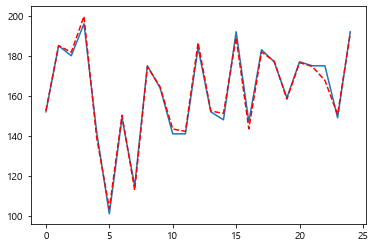

In [31]:
plt.plot(y_data)
plt.plot(p, 'r--')
plt.show()

In [33]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [34]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [35]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [36]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [37]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |


In [38]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['MEDV'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [43]:
x_data = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y_data = boston_df['MEDV']

In [44]:
modelboston_lr = LinearRegression()
modelboston_lr.fit(x_data, y_data)

LinearRegression()

In [47]:
modelboston_lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [48]:
modelboston_lr.intercept_

36.45948838509015

In [49]:
modelboston_lr.predict([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

array([25.02556238])

In [55]:
# 결론 : 다중(scale)
x_data.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [58]:
y_data.values

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [56]:
scaleX = StandardScaler()  # numpy(ndarray) maxtrix
x_dataS = scaleX.fit_transform(x_data.values)

In [57]:
x_dataS

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_dataS, y_data.values, test_size=0.2, random_state=1)  
# ndarray 4개 [np.array([...])], [np.array([...])], [np.array([...])], [np.array([...])]

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [67]:
modelSGD = SGDRegressor(verbose=1)
modelSGD.fit(x_train, y_train)

-- Epoch 1
Norm: 4.10, NNZs: 13, Bias: 15.734657, T: 404, Avg. loss: 100.367424
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.67, NNZs: 13, Bias: 19.548425, T: 808, Avg. loss: 24.326747
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.16, NNZs: 13, Bias: 21.101857, T: 1212, Avg. loss: 14.805396
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.37, NNZs: 13, Bias: 21.815662, T: 1616, Avg. loss: 12.603718
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.63, NNZs: 13, Bias: 22.165071, T: 2020, Avg. loss: 11.967951
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.63, NNZs: 13, Bias: 22.337623, T: 2424, Avg. loss: 11.749383
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.70, NNZs: 13, Bias: 22.439854, T: 2828, Avg. loss: 11.616631
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 13, Bias: 22.529591, T: 3232, Avg. loss: 11.518995
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.93, NNZs: 13, Bias: 22.535269, T: 3636, Avg. loss: 11.455118
T

SGDRegressor(verbose=1)

In [72]:
modelSGD.score(x_train, y_train)

0.7282543895264559

In [73]:
modelSGD.score(x_test, y_test)

0.7631824641945311

train 점수  
test 점수
- test 점수가 많이 낮으면 (과적합)
- test 점수가 많이 높으면 (과소적합)

In [69]:
modelSGD.predict([x_test[0]])

array([32.20815203])

In [70]:
x_test[0]

array([-0.41477789,  0.92862338, -1.30687771, -0.27259857, -0.71434722,
        0.80402837,  0.0613455 , -0.29108882, -0.29308074, -1.10611514,
       -0.02567665,  0.44105193, -0.71811916])

In [71]:
y_test[0]

28.2

In [80]:
xd = scaleX.transform([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

In [82]:
modelSGD.predict(xd)

array([24.9300694])

# iris dataset

In [83]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [84]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [85]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [86]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [90]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


sl(target), feature(sw, pl, pw)  
Q) sw : 3.0, pl : 1.4, pw : 0.2  _  sl를 예측  
1. scale  
2. train, test  
3. train, test score  
4. 예측

In [92]:
# Q1. scale
x_data = iris_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_data = iris_df['sepal length (cm)']

In [93]:
scaleX = StandardScaler()  # numpy(ndarray) maxtrix
x_dataS = scaleX.fit_transform(x_data.values)

In [94]:
x_dataS

array([[ 1.01900435e+00, -1.34022653e+00, -1.31544430e+00],
       [-1.31979479e-01, -1.34022653e+00, -1.31544430e+00],
       [ 3.28414053e-01, -1.39706395e+00, -1.31544430e+00],
       [ 9.82172869e-02, -1.28338910e+00, -1.31544430e+00],
       [ 1.24920112e+00, -1.34022653e+00, -1.31544430e+00],
       [ 1.93979142e+00, -1.16971425e+00, -1.05217993e+00],
       [ 7.88807586e-01, -1.34022653e+00, -1.18381211e+00],
       [ 7.88807586e-01, -1.28338910e+00, -1.31544430e+00],
       [-3.62176246e-01, -1.34022653e+00, -1.31544430e+00],
       [ 9.82172869e-02, -1.28338910e+00, -1.44707648e+00],
       [ 1.47939788e+00, -1.28338910e+00, -1.31544430e+00],
       [ 7.88807586e-01, -1.22655167e+00, -1.31544430e+00],
       [-1.31979479e-01, -1.34022653e+00, -1.44707648e+00],
       [-1.31979479e-01, -1.51073881e+00, -1.44707648e+00],
       [ 2.16998818e+00, -1.45390138e+00, -1.31544430e+00],
       [ 3.09077525e+00, -1.28338910e+00, -1.05217993e+00],
       [ 1.93979142e+00, -1.39706395e+00

In [95]:
# Q2. train, test
x_train, x_test, y_train, y_test = train_test_split(x_dataS, y_data.values, test_size=0.2, random_state=1)  

In [96]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


In [97]:
# Q3. 
modelSGD = SGDRegressor(verbose=1)
modelSGD.fit(x_train, y_train)

-- Epoch 1
Norm: 0.41, NNZs: 3, Bias: 2.231250, T: 120, Avg. loss: 10.461761
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 3, Bias: 3.239478, T: 240, Avg. loss: 4.812204
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 3, Bias: 3.886569, T: 360, Avg. loss: 2.631353
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.51, NNZs: 3, Bias: 4.336228, T: 480, Avg. loss: 1.551708
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.51, NNZs: 3, Bias: 4.662592, T: 600, Avg. loss: 0.964665
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.51, NNZs: 3, Bias: 4.905494, T: 720, Avg. loss: 0.627959
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 3, Bias: 5.090058, T: 840, Avg. loss: 0.426855
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.52, NNZs: 3, Bias: 5.234435, T: 960, Avg. loss: 0.302782
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.53, NNZs: 3, Bias: 5.346795, T: 1080, Avg. loss: 0.224224
Total training time: 0.00 seconds.

SGDRegressor(verbose=1)

In [98]:
modelSGD.score(x_train, y_train)

0.8047040951370684

In [99]:
modelSGD.score(x_test, y_test)

0.8133128181849063

In [101]:
# Q4. 
xd = scaleX.transform([[3.0, 1.4, 0.2]])
modelSGD.predict(xd)

array([4.7583983])

StandardScaler

각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.  
특성의 최솟값과 최댓값 크기를 제한하지 않는다.  
StandardScaler 공식 : (x-mean)/std
    

MinMaxScaler  
모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경한다.  
MinMaxScaler 공식 : (x−x_min)/(x_max−x_min)

    
RobustScaler  
특성들이 같은 스케일을 가지게 한다.  
(이러한 특징은 통계적 측면에서는 StandardScaler와 유사하다.)  
평균과 분산 대신 median과 quantile을 사용한다.  
따라서, outlier의 영향을 받지 않는다.  
RobustScaler 공식 : (x−q2)/(q3−q1)
